In [1]:
import pefile
import pandas as pd
import os
import numpy as np



In [2]:
def join_datasets():
    directory = "./MALWR/"
    general_data = []
    for filename in os.listdir(directory):
        if filename != '.DS_Store':
            filepath = os.path.join(directory, filename)
            pe = pefile.PE(filepath)
            opHeader = pe.OPTIONAL_HEADER
            fHeader = pe.FILE_HEADER
            virtualSize = []
            virtualAddress = []
            sections = []
            rawDataSize = []
            for section in pe.sections:
                sections.append(str(section.Name.decode('utf-8')).rstrip('\x00'))
                virtualAddress.append(hex(section.VirtualAddress))
                virtualSize.append(hex(section.Misc_VirtualSize))
                rawDataSize.append(section.SizeOfRawData)               
            dllCalls = []
            functionsCalled = []
            for entry in pe.DIRECTORY_ENTRY_IMPORT:
                dllCalls.append(str(entry.dll.decode('utf-8')))
                for function in entry.imports:
                    functionsCalled.append(str(function.name.decode('utf-8')))
        general_data.append([filename, 
                             sections, 
                             virtualAddress, 
                             virtualSize, 
                             rawDataSize, 
                             dllCalls, 
                             functionsCalled,
                             fHeader.NumberOfSections,
                             opHeader.BaseOfCode,
                             opHeader.ImageBase,
                             opHeader.SizeOfInitializedData,
                             opHeader.SizeOfCode,
                             opHeader.AddressOfEntryPoint,
                             dllCalls,
                             functionsCalled
                             ])
            
    
    column_names = ['filename', 
                    'sections', 
                    'virtualAddress', 
                    'virtualSize', 
                    'rawDataSize', 
                    'dllCalls', 
                    'functionsCalled',
                    'sectionNumber',
                    'baseOfCode',
                    'imageBase',
                    'sizeOfInitializedData',
                    'sizeOfCode',
                    'addressOfEntryPoint',
                    'dllCalls',
                    'functionsCalled']

    df = pd.DataFrame(data=general_data, columns=column_names)
    return df


In [3]:
df = join_datasets()
df.head()

,filename,sections,virtualAddress,virtualSize,rawDataSize,dllCalls,functionsCalled,sectionNumber,baseOfCode,imageBase,sizeOfInitializedData,sizeOfCode,addressOfEntryPoint,dllCalls,functionsCalled
0,AAAz2E1B6940985A23E5639450F8391820655,"[UPX0, UPX1, UPX2]","[0x1000, 0x71000, 0xc5000]","[0x70000, 0x54000, 0x1000]","[0, 342528, 1024]","[ADVAPI32.dll, GDI32.dll, KERNEL32.DLL, MSVCRT...","[RegSaveKeyA, BitBlt, LoadLibraryA, GetProcAdd...",3,462848,268435456,4096,344064,804608,"[ADVAPI32.dll, GDI32.dll, KERNEL32.DLL, MSVCRT...","[RegSaveKeyA, BitBlt, LoadLibraryA, GetProcAdd..."
1,SAM_B659D71AE168E774FAAF38DB30F4A84,"[.text, .rdata, .data]","[0x1000, 0x4000, 0x5000]","[0x25da, 0xa24, 0x3d2468]","[9728, 3072, 1536]","[KERNEL32.dll, USER32.dll, ADVAPI32.dll, SHELL...","[CreateFileA, LocalAlloc, Sleep, CreateThread,...",3,4096,4194304,4010496,9728,3422617582,"[KERNEL32.dll, USER32.dll, ADVAPI32.dll, SHELL...","[CreateFileA, LocalAlloc, Sleep, CreateThread,..."
2,QW2_4C6BDDCCA2695D6202DF38708E14FC7E,"[UPX0, UPX1, .rsrc]","[0x1000, 0x60000, 0xa8000]","[0x5f000, 0x48000, 0x1000]","[0, 292352, 2048]","[ADVAPI32.dll, GDI32.dll, KERNEL32.DLL, MSVCRT...","[RegSaveKeyA, BitBlt, LoadLibraryA, GetProcAdd...",3,393216,268435456,4096,294912,684672,"[ADVAPI32.dll, GDI32.dll, KERNEL32.DLL, MSVCRT...","[RegSaveKeyA, BitBlt, LoadLibraryA, GetProcAdd..."
3,EEE99EC8AA67B05407C01094184C33D2B5A44,"[UPX0, UPX1, .rsrc]","[0x1000, 0x6000, 0x7000]","[0x5000, 0x1000, 0x1000]","[0, 3584, 512]","[KERNEL32.DLL, MSVCRT.dll, USER32.dll, WS2_32....","[LoadLibraryA, ExitProcess, GetProcAddress, Vi...",3,24576,4194304,4096,4096,27632,"[KERNEL32.DLL, MSVCRT.dll, USER32.dll, WS2_32....","[LoadLibraryA, ExitProcess, GetProcAddress, Vi..."
4,65018CD542145A3792BA09985734C12A,"[UPX0, UPX1, .rsrc]","[0x1000, 0x6000, 0x7000]","[0x5000, 0x1000, 0x1000]","[0, 4096, 512]","[KERNEL32.DLL, MSVCRT.dll, SHELL32.dll, USER32...","[LoadLibraryA, ExitProcess, GetProcAddress, Vi...",3,24576,4194304,4096,4096,28048,"[KERNEL32.DLL, MSVCRT.dll, SHELL32.dll, USER32...","[LoadLibraryA, ExitProcess, GetProcAddress, Vi..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   filename               41 non-null     object
 1   sections               41 non-null     object
 2   virtualAddress         41 non-null     object
 3   virtualSize            41 non-null     object
 4   rawDataSize            41 non-null     object
 5   dllCalls               41 non-null     object
 6   functionsCalled        41 non-null     object
 7   sectionNumber          41 non-null     int64 
 8   baseOfCode             41 non-null     int64 
 9   imageBase              41 non-null     int64 
 10  sizeOfInitializedData  41 non-null     int64 
 11  sizeOfCode             41 non-null     int64 
 12  addressOfEntryPoint    41 non-null     int64 
 13  dllCalls               41 non-null     object
 14  functionsCalled        41 non-null     object
dtypes: int64(6), object(9)
me

In [5]:
df.describe()

,sectionNumber,baseOfCode,imageBase,sizeOfInitializedData,sizeOfCode,addressOfEntryPoint
count,41.000000,4.100000e+01,4.100000e+01,4.100000e+01,41.000000,4.100000e+01
mean,3.024390,2.447610e+05,3.641883e+07,7.858700e+05,68533.073171,6.681374e+08
std,0.156174,5.331867e+05,8.754166e+07,1.607515e+06,128718.345816,1.373060e+09
min,3.000000,4.096000e+03,4.194304e+06,4.096000e+03,4096.000000,2.763200e+04
25%,3.000000,2.457600e+04,4.194304e+06,4.096000e+03,4096.000000,2.806400e+04
50%,3.000000,2.457600e+04,4.194304e+06,4.096000e+03,4096.000000,2.806400e+04
75%,3.000000,3.317760e+05,4.194304e+06,4.096000e+03,12288.000000,2.042528e+06
max,4.000000,2.031616e+06,2.684355e+08,4.012032e+06,348160.000000,3.422618e+09


In [6]:
df2 = df.select_dtypes(include=np.number)
df2.head()

,sectionNumber,baseOfCode,imageBase,sizeOfInitializedData,sizeOfCode,addressOfEntryPoint
0,3,462848,268435456,4096,344064,804608
1,3,4096,4194304,4010496,9728,3422617582
2,3,393216,268435456,4096,294912,684672
3,3,24576,4194304,4096,4096,27632
4,3,24576,4194304,4096,4096,28048


sectionNumber:
Kurtosis: 36.02500000000001 
Skewness: 6.166441437328341 

baseOfCode:
Kurtosis: 6.724856921564051 
Skewness: 2.80862954840921 

imageBase:
Kurtosis: 3.338888888888886 
Skewness: 2.310603576749782 

sizeOfInitializedData:
Kurtosis: 0.367424602339419 
Skewness: 1.5386437128511907 

sizeOfCode:
Kurtosis: 0.5044369897829553 
Skewness: 1.5668750839760928 

addressOfEntryPoint:
Kurtosis: 0.3674233940809821 
Skewness: 1.5386430294347497 



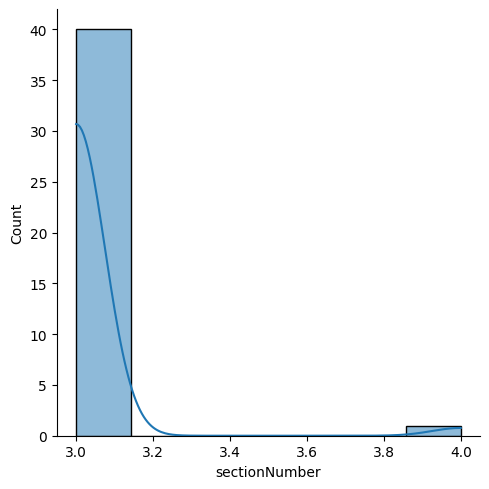

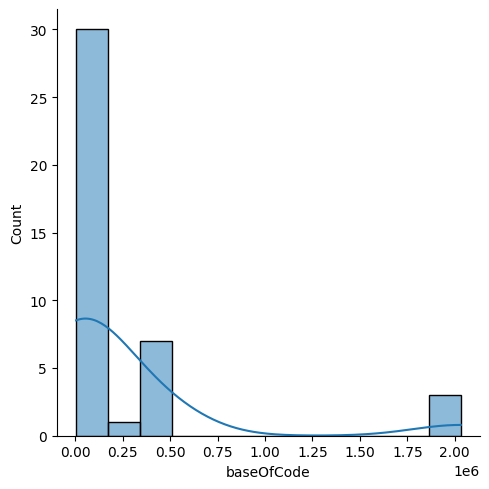

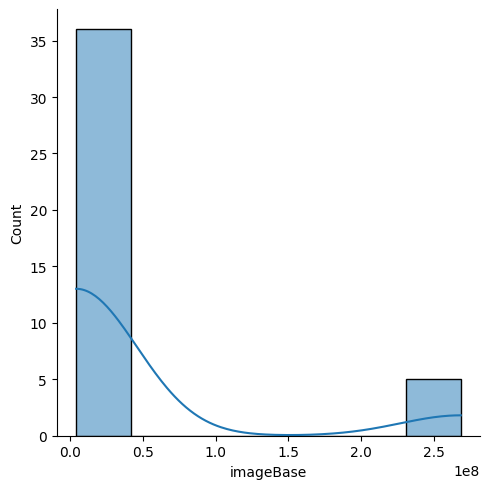

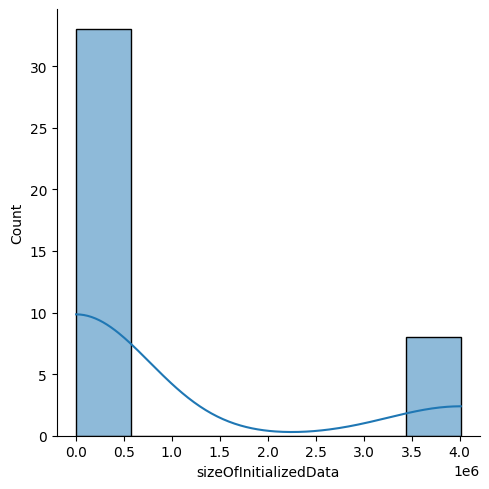

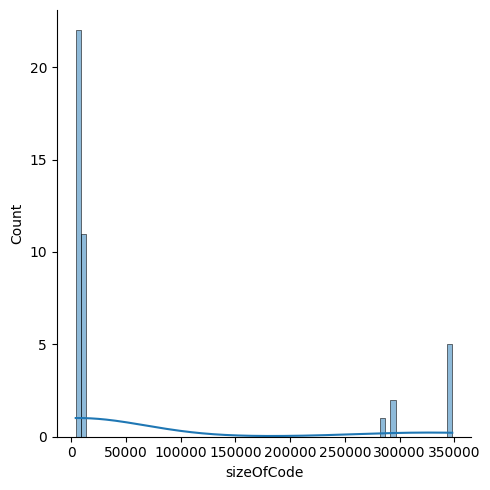

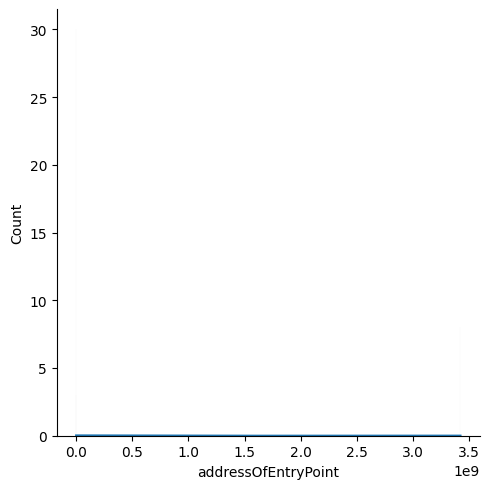

In [7]:
import seaborn as sns
from scipy import stats
for i in df2:
  n_data = df2[i].dropna(how='all', axis=0)
  sns.displot(n_data, kde=True)
  print(i+ ':\nKurtosis:', stats.kurtosis(n_data), '\nSkewness:', stats.skew(n_data), '\n')

/home/oscar/Documents/UVG/SDS/SDS-LAB04/venv/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:240: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/oscar/Documents/UVG/SDS/SDS-LAB04/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/oscar/Documents/UVG/SDS/SDS-LAB04/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/oscar/Documents/UVG/SDS/SDS-LAB04/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change fr

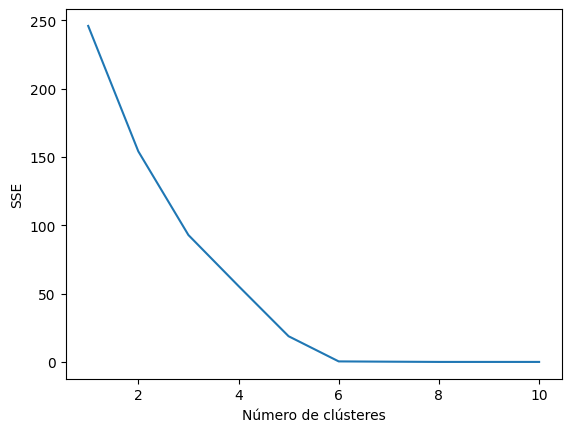

In [19]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import sklearn.preprocessing

df3 = sklearn.preprocessing.scale(df2)
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df3)
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Número de clústeres")
plt.ylabel("SSE")
plt.show()


/home/oscar/Documents/UVG/SDS/SDS-LAB04/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


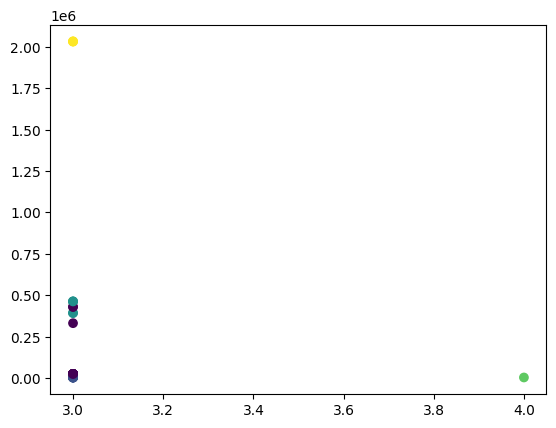

In [25]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
k=5
kmeans = KMeans(n_clusters=k).fit(df3)
labels = kmeans.predict(df3)

plt.scatter(df2.iloc[:, 0], df2.iloc[:, 1], c=labels)
plt.show()


/home/oscar/Documents/UVG/SDS/SDS-LAB04/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/oscar/Documents/UVG/SDS/SDS-LAB04/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/oscar/Documents/UVG/SDS/SDS-LAB04/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/oscar/Documents/UVG/SDS/SDS-LAB04/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the va

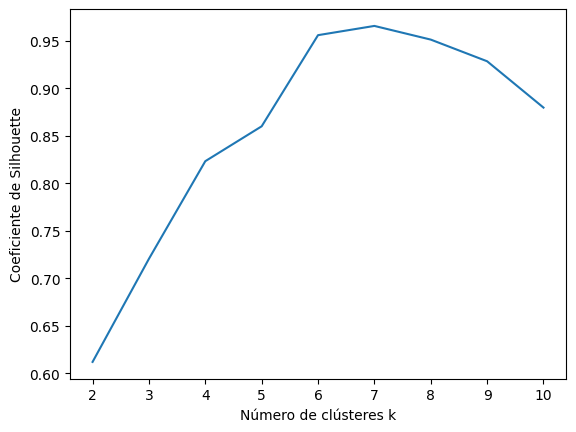

In [27]:
from sklearn.metrics import silhouette_score
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df3)
    silhouette_scores.append(silhouette_score(df3, kmeans.labels_))

plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('Número de clústeres k')
plt.ylabel('Coeficiente de Silhouette')
plt.show()


#### 1. ¿Para qué número de clústeres se obtiene el coeficiente de Silhouette más alto?
##### El coeficiente de silhouette mas alto se obtiene con 6 clusters
#### 2. ¿Coincide el coeficiente de Silhouette con el método del codo?
##### No coincide porque el metodo del codo indicaba que k = 5
#### 3. ¿Cuántas familias existen entre los ejemplares de malware proporcionados?
##### se identificaron 5 familias de malware